# EDA Companies Twitter

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
# pip install wordcloud
from wordcloud import WordCloud
from itertools import chain

In [2]:
import nltk
import re

In [3]:
# import the data
df = pd.read_parquet("0-324.parquet.gzip")

In [5]:
df.isna().sum().sum()

12

In [5]:
df=df.dropna()

In [51]:
df.isna().sum()

username    0
user_id     0
text        0
dtype: int64

## Most Common Words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

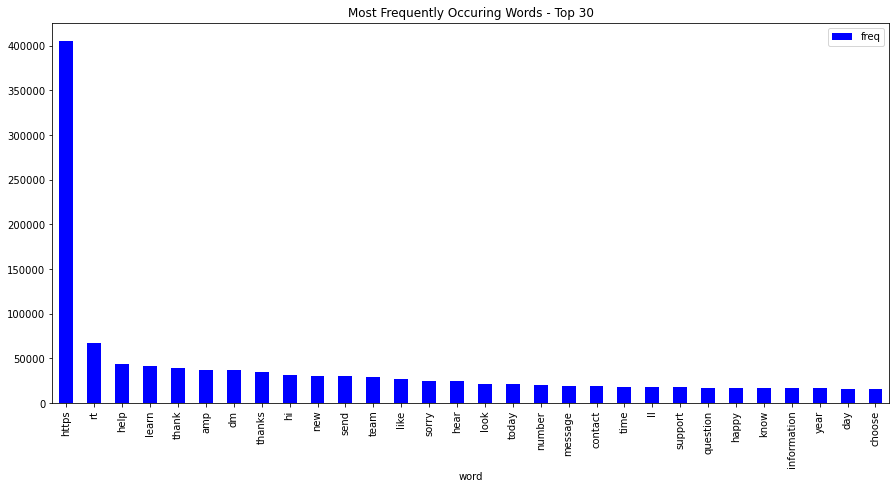

In [7]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

# ax = sns.countplot(x="word", data=frequency.head(30))

## Word Cloud of Common Vocabulary

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

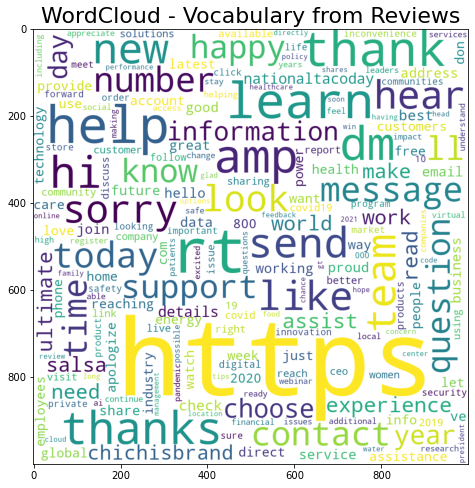

In [53]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Twits", fontsize = 22)

## Common Hashtags

In [54]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [56]:
hashtag = hashtag_extract(df['text'])
ht = [x for x in hashtag if x != []]

In [61]:
# unnesting
# ht = sum(ht,[])
# ht

ht=list(chain.from_iterable(ht))

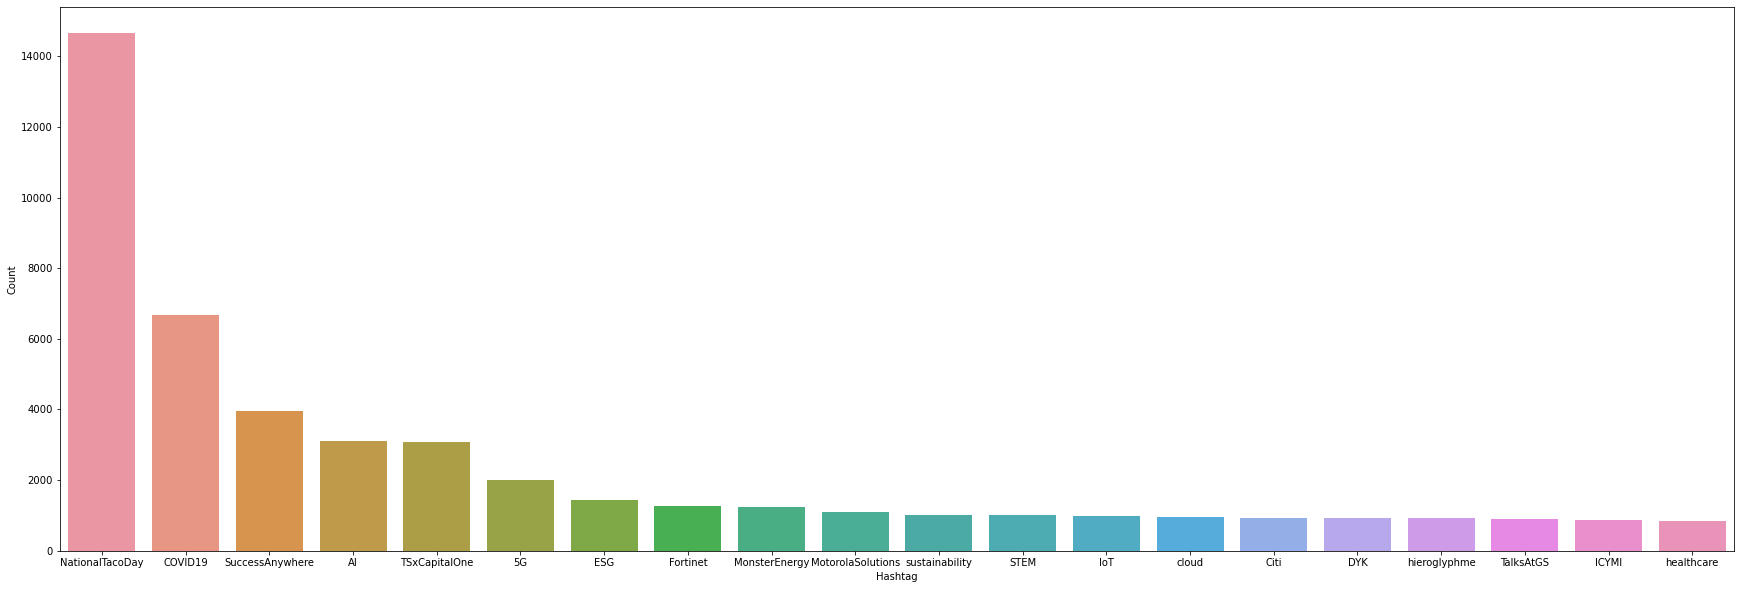

In [67]:
distr_hash = nltk.FreqDist(ht)
df_hash = pd.DataFrame({'Hashtag': list(distr_hash.keys()),
                  'Count': list(distr_hash.values())})

# selecting top 20 most frequent hashtags     
df_hash = df_hash.nlargest(columns="Count", n=20) 
plt.figure(figsize=(30,10))
ax = sns.barplot(data=df_hash, x="Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

In [4]:
df

,username,user_id,text
index,,,
0,3m,378197959.0,@ryaninmpls Sorry to hear of the difficulty! P...
1,3m,378197959.0,3M's #StateOfScience Index found that 87% of p...
2,3m,378197959.0,"@dustinalexander Hi Dustin, thanks for your fe..."
3,3m,378197959.0,@Mohan56925135 Hello - Thank you for reaching ...
4,3m,378197959.0,The world is safer and healthier when people t...
...,...,...,...
85223,sempraenergy,20637451.0,RT @SDGE: ICYMI - @sdut recently profiled the ...
85224,sempraenergy,20637451.0,RT @SoCalGasNews: Jimmie I. Cho has been named...
85225,sempraenergy,20637451.0,RT @SDGE: The winter chill we are experiencing...


In [7]:
df['username'].unique()

array(['3m', 'aosmithhotwater', 'abbottnews', 'abbvie', 'accenture',
       'atvi_ab', 'adobe', 'advanceauto', 'theaescorp', 'aflac',
       'agilent', 'airproducts', 'akamai', 'albemarlecorp',
       'alexionpharma', 'allegionplc', 'alliancedata', 'alliantenergy',
       'allstate', 'altrianews', 'amazon', 'americanair', 'aepnews',
       'americanexpress', 'aiginsurance', 'amwater', 'healthcare_abc',
       'ametekinc', 'amgen', 'amphenol', 'adi_news', 'ansys', 'antheminc',
       'aon_plc', 'aimcoapts', 'applied4tech', 'aptiv', 'admupdates',
       'aristanetworks', 'gallagherglobal', 'assurant', 'att',
       'atmosenergy', 'autodesk', 'adp', 'autozone', 'avalonbay',
       'averydennison', 'ballcorphq', 'bankofamerica', 'baxter_intl',
       'bestbuy', 'biogen', 'boeing', 'bookingholdings', 'borgwarner',
       'bxpboston', 'bostonsci', 'bmsnews', 'broadcom', 'broadridge',
       'chrobinson', 'cabotog', 'cadence', 'campbellsoupco', 'capitalone',
       'cardinalhealth', 'carmax',

In [42]:
grouped=df.groupby(['username','user_id'])
grouped.first()

,,text
username,user_id,
3m,3.781980e+08,@ryaninmpls Sorry to hear of the difficulty! P...
abbottnews,3.600544e+08,"@Serilumm Hi Zach, thanks for your note. Pleas..."
abbvie,5.318925e+08,"This weekend, we’re sharing our latest researc..."
accenture,1.019468e+07,✨New podcast alert!✨ Introducing #BuiltForChan...
adi_news,3.772262e+07,This #AnalogDialogue article builds on the gen...
...,...,...
smuckers,3.148247e+08,@jeremygsmith1 Thanks for reaching out. If you...
spglobal,1.105221e+08,From @SPGlobalPlatts: Do fundamentals support ...
theaescorp,2.541746e+09,Free market consumers are more likely to focus...


## Emojis Used

In [22]:
# pip install emoji
import emoji

''

In [50]:
emojis_df=[]
for string in df['text']:
    my_str = str(string)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI:
            emojis_df.append(each)
print(emojis_df)
# freq = dict(Counter(i for sub in emojis_df for i in set(sub))) 

[]


In [60]:
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

emojis=extract_emojis(df['text'].iloc[84210])
emojis

''

In [64]:
emoji.extract_emoji(df['text'].iloc[84210])

AttributeError: module 'emoji' has no attribute 'extract_emoji'

In [67]:
def extract_emojis(text):
    return re.findall(emoji.get_emoji_regexp(), text)
# emojis = extract_emojis(df['text'].iloc[84210])
# emojis

['🎮']

In [68]:
emojis_df=[]
for string in df['text']:
    emojis=extract_emojis(string)
    if emojis!=[]:
        emojis_df.append(emojis)
        
emojis_df 

[['🚄'],
 ['💡'],
 ['💡'],
 ['™'],
 ['🚆', '💡'],
 ['™'],
 ['🙌'],
 ['™', '💡'],
 ['™'],
 ['💯'],
 ['🌎'],
 ['™', '📷'],
 ['💬'],
 ['🌊'],
 ['™'],
 ['🙌'],
 ['⚾'],
 ['🙌'],
 ['🥽'],
 ['💌', '❤', '📷'],
 ['™'],
 ['™'],
 ['👍'],
 ['😍'],
 ['😍'],
 ['🙂'],
 ['😍'],
 ['®'],
 ['🙌'],
 ['™', '™'],
 ['™', '™', '™', '™'],
 ['™'],
 ['™', '™'],
 ['™', '™'],
 ['📹'],
 ['😍', '🙌'],
 ['🎅', '🌟', '📷'],
 ['🎄', '❤', '📷'],
 ['🎄', '📷'],
 ['👏'],
 ['🤗'],
 ['™', '™'],
 ['™', '™'],
 ['🙌'],
 ['💯', '😷'],
 ['®', '😍'],
 ['😂', '👍'],
 ['😉'],
 ['👟', '🙌'],
 ['👏'],
 ['™', '™'],
 ['™'],
 ['®'],
 ['♥'],
 ['™'],
 ['🙌'],
 ['™'],
 ['™'],
 ['🙂'],
 ['💡'],
 ['🐟', '🌊'],
 ['™', '™'],
 ['♥'],
 ['🙌'],
 ['😉', '💡'],
 ['🙌'],
 ['🎄'],
 ['🌎'],
 ['™'],
 ['™'],
 ['™', '™'],
 ['🙌'],
 ['👩\u200d🔬'],
 ['🙌'],
 ['™', '™'],
 ['🧫', '🦠', '🧪'],
 ['😀'],
 ['🔬'],
 ['😍'],
 ['🙌'],
 ['™'],
 ['®'],
 ['™', '™'],
 ['®', '😉', '🙌'],
 ['®'],
 ['🇺🇸', '🇰🇷'],
 ['®'],
 ['🙌'],
 ['™'],
 ['™', '™'],
 ['®'],
 ['®'],
 ['™', '™'],
 ['👏'],
 ['™'],
 ['🏆'],
 ['™'],
 ['™'],
 ['™'],
 ['™', '™'],
 

In [70]:
emojis=list(chain.from_iterable(emojis_df))

## Sentiment Analysis with VADER

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# nltk.download() # downloading VADER lexicon
# pip install vaderSentiment

In [93]:
sid = SIA()
sid.polarity_scores(df['text'].iloc[7])

{'neg': 0.11, 'neu': 0.744, 'pos': 0.146, 'compound': 0.3164}

In [95]:
df['scores'] = df['text'].apply(lambda twit: sid.polarity_scores(twit))

df.head()

<ipython-input-95-fc67ed2242a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scores'] = df['text'].apply(lambda twit: sid.polarity_scores(twit))


,username,user_id,text,scores
index,,,,
0,3m,378197959.0,@ryaninmpls Sorry to hear of the difficulty! P...,"{'neg': 0.106, 'neu': 0.659, 'pos': 0.235, 'co..."
1,3m,378197959.0,3M's #StateOfScience Index found that 87% of p...,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp..."
2,3m,378197959.0,"@dustinalexander Hi Dustin, thanks for your fe...","{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp..."
3,3m,378197959.0,@Mohan56925135 Hello - Thank you for reaching ...,"{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp..."
4,3m,378197959.0,The world is safer and healthier when people t...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp..."


In [98]:
pos, neg, neu, comp = [], [], [], []
for text in df['text']:
    sentiment = sid.polarity_scores(text)
    pos.append(sentiment['pos'])
    neg.append(sentiment['neg'])
    neu.append(sentiment['neu'])
    comp.append(sentiment['compound'])
    
df_tweets_sentiment = pd.DataFrame()
# df_tweets_sentiment.columns = ['tweet_text', 'positive', 'negative', 'neutral', 'compound']
df['positive'] = pos
df['negative'] = neg
df['neutral'] = neu
df['compound'] = comp
df

<ipython-input-98-c6947f475339>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive'] = pos
<ipython-input-98-c6947f475339>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negative'] = neg
<ipython-input-98-c6947f475339>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,username,user_id,text,scores,positive,negative,neutral,compound
index,,,,,,,,
0,3m,378197959.0,@ryaninmpls Sorry to hear of the difficulty! P...,"{'neg': 0.106, 'neu': 0.659, 'pos': 0.235, 'co...",0.235,0.106,0.659,0.6696
1,3m,378197959.0,3M's #StateOfScience Index found that 87% of p...,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.241,0.000,0.759,0.9134
2,3m,378197959.0,"@dustinalexander Hi Dustin, thanks for your fe...","{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",0.372,0.000,0.628,0.7712
3,3m,378197959.0,@Mohan56925135 Hello - Thank you for reaching ...,"{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...",0.373,0.000,0.627,0.9253
4,3m,378197959.0,The world is safer and healthier when people t...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.217,0.000,0.783,0.8658
...,...,...,...,...,...,...,...,...
85223,sempraenergy,20637451.0,RT @SDGE: ICYMI - @sdut recently profiled the ...,"{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...",0.329,0.000,0.671,0.8519
85224,sempraenergy,20637451.0,RT @SoCalGasNews: Jimmie I. Cho has been named...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
85225,sempraenergy,20637451.0,RT @SDGE: The winter chill we are experiencing...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


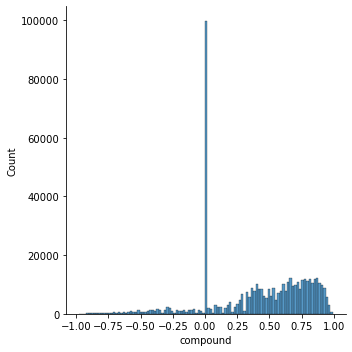

In [107]:
sns.displot(df, x="compound")

In [110]:
df_negative = df.query("compound<0")
print(df_negative)
print(df_new["text"].iloc[0])

           username      user_id  \
index                              
35               3m  378197959.0   
54               3m  378197959.0   
58               3m  378197959.0   
176              3m  378197959.0   
197              3m  378197959.0   
...             ...          ...   
85025  sempraenergy   20637451.0   
85107  sempraenergy   20637451.0   
85185  sempraenergy   20637451.0   
85217  sempraenergy   20637451.0   
85221  sempraenergy   20637451.0   

                                                    text  \
index                                                      
35     @PublicHealthJM Hello! We are sorry to hear of...   
54     @Helll000 Our N95 respirators are designed to ...   
58     @Helll000 Thank you for reaching out to us. Ge...   
176    Concerned. Sad. Fearful. Anxious. \nThese are ...   
197    Today marks a year since @WHO declared a globa...   
...                                                  ...   
85025  RT @SDGE: Local media joined us in our Emerg

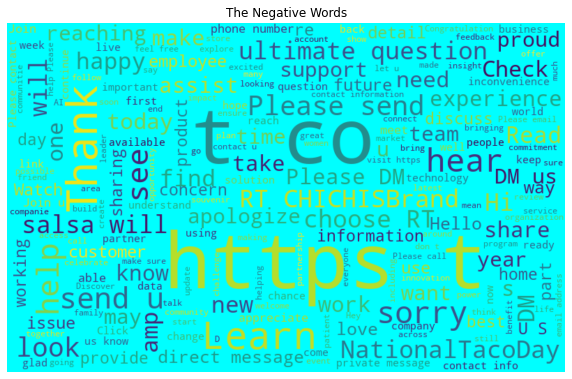

In [111]:
negative_words =' '.join([text for text in df['text'][df['compound'] < 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [112]:
# calculating sentiment mean per company
grouped_sentiment=df.groupby('username', as_index=False)['compound'].mean()
grouped_sentiment

,username,compound
0,3m,0.557872
1,abbottnews,0.438018
2,abbvie,0.383662
3,accenture,0.408355
4,adi_news,0.293241
...,...,...
295,smuckers,0.647990
296,spglobal,0.176926
297,theaescorp,0.567376
298,thehartford,0.517612


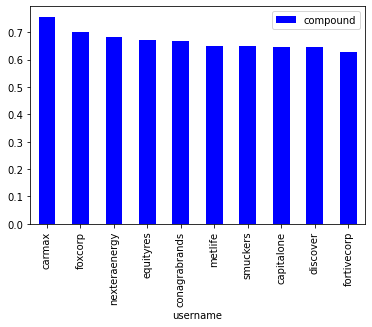

In [125]:
grouped_sentiment.nlargest(10,'compound').plot.bar(x='username',color="blue")
plt.show()
# highest compound score — most positive companies

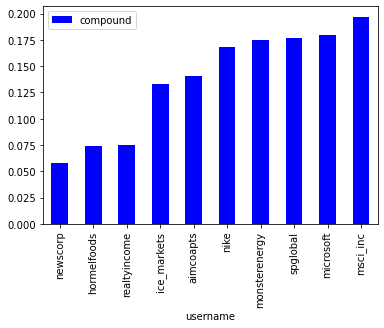

In [126]:
grouped_sentiment.nsmallest(10,'compound').plot.bar(x='username',color="blue")
plt.show()
# lowest compound score — least positive companies